### LOADING

In [1]:
#Importaciones
from functions import *
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#Cargando base de datos
url_robberies = ("https://github.com/LuisHRF/Home-Insurance-Study-Project-/raw/main/01002%20(1).xlsx")
data_raw_robberies = pd.read_excel(url_robberies)

### CLEANING AND FORMATTING

In [3]:
# Limpiar los valores Na.
data_clean = data_raw_robberies.dropna()

In [4]:
# Ver los valores únicos de la primera columna
unique_first_column = data_clean.iloc[:, 0].unique()
unique_first_column

array(['    Total Nacional', '    Araba/Álava', '    Albacete',
       '    Alicante/Alacant', '    Almería', '    Ávila', '    Badajoz',
       '    Balears (Illes)', '    Barcelona', '    Burgos',
       '    Cáceres', '    Cádiz', '    Castellón/Castelló',
       '    Ciudad Real', '    Córdoba', '    Coruña (A)', '    Cuenca',
       '    Girona', '    Granada', '    Guadalajara', '    Gipuzkoa',
       '    Huelva', '    Huesca', '    Jaén', '    León', '    Lleida',
       '    Rioja (La)', '    Lugo', '    Madrid', '    Málaga',
       '    Murcia', '    Navarra', '    Ourense', '    Asturias',
       '    Palencia', '    Palmas (Las)', '    Pontevedra',
       '    Salamanca', '    Santa Cruz de Tenerife', '    Cantabria',
       '    Segovia', '    Sevilla', '    Soria', '    Tarragona',
       '    Teruel', '    Toledo', '    Valencia/València',
       '    Valladolid', '    Bizkaia', '    Zamora', '    Zaragoza',
       '    Ceuta', '    Melilla', '    En el extranjero',
   

In [5]:
block_sizes = [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
start = 1
year_ranges = {}

for i, size in enumerate(block_sizes):
    end = start + size - 1
    year = 2023 - i
    year_ranges[(start, end)] = year
    start = end + 2  

print(year_ranges)

{(1, 55): 2023, (57, 111): 2022, (113, 167): 2021, (169, 223): 2020, (225, 279): 2019, (281, 335): 2018, (337, 391): 2017, (393, 447): 2016, (449, 503): 2015, (505, 559): 2014, (561, 615): 2013, (617, 671): 2012, (673, 727): 2011, (729, 783): 2010}


In [6]:
data_clean_years = defi_years_per_block(data_clean, year_ranges)

In [7]:
# Limpieza de Encabezados
data_clean_years.columns = data_clean_years.columns.str.lower().str.replace(" ", "_")
data_clean_years = data_clean_years.rename(columns={
    "_": "Province"
})
data_clean_years

,Province,1._contra_las_personas,1.2.-lesiones,5.1.-hurtos,5.2.-robos_con_fuerza_en_las_cosas,5.2.1.-robos_con_fuerza_en_las_cosas_en_el_interior_de_vehículos,5.2.2.-robos_con_fuerza_en_viviendas,5.2.3.-robos_con_fuerza_en_establecimientos,5.3.-robos_con_violencia_o_intimidación,5.3.1.-robos_con_violencia_en_vía_pública,5.3.2.-robos_con_violencia_en_viviendas,5.3.3.-robos_con_violencia_en_establecimientos,year
1,Total Nacional,226761.0,118125.0,665622.0,272638.0,104988.0,84721.0,35072.0,64711.0,44406.0,3844.0,8238.0,2023.0
2,Araba/Álava,1386.0,745.0,4184.0,1099.0,8.0,434.0,178.0,114.0,82.0,6.0,14.0,2023.0
3,Albacete,1638.0,851.0,3771.0,1784.0,421.0,636.0,204.0,211.0,120.0,23.0,46.0,2023.0
4,Alicante/Alacant,11416.0,5326.0,27014.0,12716.0,3723.0,6275.0,1241.0,1997.0,1161.0,245.0,343.0,2023.0
5,Almería,4343.0,2517.0,6437.0,4193.0,1106.0,1602.0,399.0,657.0,397.0,67.0,81.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,Zaragoza,5171.0,1988.0,14860.0,7904.0,1895.0,1756.0,1271.0,1531.0,1052.0,96.0,235.0,2010.0
780,Ceuta,833.0,393.0,983.0,723.0,497.0,93.0,49.0,189.0,141.0,8.0,13.0,2010.0
781,Melilla,1011.0,501.0,1043.0,774.0,427.0,156.0,79.0,194.0,171.0,1.0,8.0,2010.0
782,En el extranjero,158.0,17.0,2427.0,674.0,142.0,19.0,51.0,177.0,138.0,5.0,6.0,2010.0


In [8]:
# Eliminar algunas columnas inservibles

print(data_clean_years['Province'].unique())
data_clean_years['Province'] = data_clean_years['Province'].str.strip()

provincias_a_eliminar = ['Desconocida', 'En el extranjero', 'Total Nacional']
df_cleaned_af = data_clean_years[~data_clean_years['Province'].isin(provincias_a_eliminar)]
print(df_cleaned_af)

['    Total Nacional' '    Araba/Álava' '    Albacete'
 '    Alicante/Alacant' '    Almería' '    Ávila' '    Badajoz'
 '    Balears (Illes)' '    Barcelona' '    Burgos' '    Cáceres'
 '    Cádiz' '    Castellón/Castelló' '    Ciudad Real' '    Córdoba'
 '    Coruña (A)' '    Cuenca' '    Girona' '    Granada'
 '    Guadalajara' '    Gipuzkoa' '    Huelva' '    Huesca' '    Jaén'
 '    León' '    Lleida' '    Rioja (La)' '    Lugo' '    Madrid'
 '    Málaga' '    Murcia' '    Navarra' '    Ourense' '    Asturias'
 '    Palencia' '    Palmas (Las)' '    Pontevedra' '    Salamanca'
 '    Santa Cruz de Tenerife' '    Cantabria' '    Segovia' '    Sevilla'
 '    Soria' '    Tarragona' '    Teruel' '    Toledo'
 '    Valencia/València' '    Valladolid' '    Bizkaia' '    Zamora'
 '    Zaragoza' '    Ceuta' '    Melilla' '    En el extranjero'
 '    Desconocida']
             Province  1._contra_las_personas  1.2.-lesiones  5.1.-hurtos  \
2         Araba/Álava                  1386.0       

In [9]:
# No se usa, ver paso anterior, Hecho a mano. 
# data_clean_years = cleaning_rows_dataframe(data_clean_years)

In [10]:
# Traducción de columnas
translations = {"Province": "Province",
                "1._contra_las_personas": "Assault",
                "1.2.-lesiones" :"Injuries",
                "5.1.-hurtos":"small robberies",
                "5.2.-robos_con_fuerza_en_las_cosas":"robs_with_force",
                "5.2.1.-robos_con_fuerza_en_las_cosas_en_el_interior_de_vehículos":"robs_force_vehicles",
                "5.2.2.-robos_con_fuerza_en_viviendas":"robs_force_homes",
                "5.2.3.-robos_con_fuerza_en_establecimientos":"robs_force_stores",
                "5.3.-robos_con_violencia_o_intimidación":"robs_violence_intimidation",
                "5.3.1.-robos_con_violencia_en_vía_pública":"robs_violence_publicways",
                "5.3.2.-robos_con_violencia_en_viviendas":"robs_violence_homes",
                "5.3.3.-robos_con_violencia_en_establecimientos":"robs_violence_stores",
                "year" : "year"
    }
df_cleaned_af.columns = traducir_columnas(df_cleaned_af.columns, translations)

In [11]:
df_cleaned_af

,Province,Assault,Injuries,small robberies,robs_with_force,robs_force_vehicles,robs_force_homes,robs_force_stores,robs_violence_intimidation,robs_violence_publicways,robs_violence_homes,robs_violence_stores,year
2,Araba/Álava,1386.0,745.0,4184.0,1099.0,8.0,434.0,178.0,114.0,82.0,6.0,14.0,2023.0
3,Albacete,1638.0,851.0,3771.0,1784.0,421.0,636.0,204.0,211.0,120.0,23.0,46.0,2023.0
4,Alicante/Alacant,11416.0,5326.0,27014.0,12716.0,3723.0,6275.0,1241.0,1997.0,1161.0,245.0,343.0,2023.0
5,Almería,4343.0,2517.0,6437.0,4193.0,1106.0,1602.0,399.0,657.0,397.0,67.0,81.0,2023.0
6,Ávila,722.0,453.0,784.0,646.0,79.0,269.0,75.0,26.0,10.0,7.0,5.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Bizkaia,6945.0,2849.0,15197.0,10849.0,29.0,2336.0,1470.0,2045.0,1449.0,157.0,261.0,2010.0
778,Zamora,810.0,340.0,1090.0,752.0,93.0,165.0,205.0,62.0,33.0,7.0,18.0,2010.0
779,Zaragoza,5171.0,1988.0,14860.0,7904.0,1895.0,1756.0,1271.0,1531.0,1052.0,96.0,235.0,2010.0
780,Ceuta,833.0,393.0,983.0,723.0,497.0,93.0,49.0,189.0,141.0,8.0,13.0,2010.0


In [12]:
# Eliminar la columna sin nombre (usualmente aparece como "Unnamed: 0")
df_cleaned_af = df_cleaned_af.drop(columns=[col for col in data_clean_years.columns if "Unnamed" in col])
df_cleaned_af

,Province,Assault,Injuries,small robberies,robs_with_force,robs_force_vehicles,robs_force_homes,robs_force_stores,robs_violence_intimidation,robs_violence_publicways,robs_violence_homes,robs_violence_stores,year
2,Araba/Álava,1386.0,745.0,4184.0,1099.0,8.0,434.0,178.0,114.0,82.0,6.0,14.0,2023.0
3,Albacete,1638.0,851.0,3771.0,1784.0,421.0,636.0,204.0,211.0,120.0,23.0,46.0,2023.0
4,Alicante/Alacant,11416.0,5326.0,27014.0,12716.0,3723.0,6275.0,1241.0,1997.0,1161.0,245.0,343.0,2023.0
5,Almería,4343.0,2517.0,6437.0,4193.0,1106.0,1602.0,399.0,657.0,397.0,67.0,81.0,2023.0
6,Ávila,722.0,453.0,784.0,646.0,79.0,269.0,75.0,26.0,10.0,7.0,5.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Bizkaia,6945.0,2849.0,15197.0,10849.0,29.0,2336.0,1470.0,2045.0,1449.0,157.0,261.0,2010.0
778,Zamora,810.0,340.0,1090.0,752.0,93.0,165.0,205.0,62.0,33.0,7.0,18.0,2010.0
779,Zaragoza,5171.0,1988.0,14860.0,7904.0,1895.0,1756.0,1271.0,1531.0,1052.0,96.0,235.0,2010.0
780,Ceuta,833.0,393.0,983.0,723.0,497.0,93.0,49.0,189.0,141.0,8.0,13.0,2010.0


In [13]:
# Restablecer el índice en 10 resultados
df_cleaned_af.reset_index(drop=True, inplace=True)
print(df_cleaned_af.to_string(index=False))

              Province  Assault  Injuries  small robberies  robs_with_force  robs_force_vehicles  robs_force_homes  robs_force_stores  robs_violence_intimidation  robs_violence_publicways  robs_violence_homes  robs_violence_stores   year
           Araba/Álava   1386.0     745.0           4184.0           1099.0                  8.0             434.0              178.0                       114.0                      82.0                  6.0                  14.0 2023.0
              Albacete   1638.0     851.0           3771.0           1784.0                421.0             636.0              204.0                       211.0                     120.0                 23.0                  46.0 2023.0
      Alicante/Alacant  11416.0    5326.0          27014.0          12716.0               3723.0            6275.0             1241.0                      1997.0                    1161.0                245.0                 343.0 2023.0
               Almería   4343.0    2517.0       

In [14]:
# Verificar y Cambiar el tipo de datos de las columnas
df_cleaned_af.columns = traducir_columnas(df_cleaned_af.columns, translations)

In [15]:
'''
# Convertir los años en datatime
df_cleaned_af = convert_year_into_datetime(df_cleaned_af)
'''
# Ver código de siguiente celda.

'\n# Convertir los años en datatime\ndf_cleaned_af = convert_year_into_datetime(df_cleaned_af)\n'

In [ ]:
df_cleaned_af['year'] = pd.to_datetime(df_cleaned_af['year'].astype(int).astype(str) + '-01-01', format='%Y-%m-%d')

# Extrae solo el año de la columna datetime
df_cleaned_af['year'] = df_cleaned_af['year'].dt.year

print(df_cleaned_af)

### ESTADÍSTICAS

#### 1. VALORES TOTALES

In [26]:
df_cleaned_af

,Province,Assault,Injuries,small robberies,robs_with_force,robs_force_vehicles,robs_force_homes,robs_force_stores,robs_violence_intimidation,robs_violence_publicways,robs_violence_homes,robs_violence_stores,year
0,Araba/Álava,1386.0,745.0,4184.0,1099.0,8.0,434.0,178.0,114.0,82.0,6.0,14.0,2023
1,Albacete,1638.0,851.0,3771.0,1784.0,421.0,636.0,204.0,211.0,120.0,23.0,46.0,2023
2,Alicante/Alacant,11416.0,5326.0,27014.0,12716.0,3723.0,6275.0,1241.0,1997.0,1161.0,245.0,343.0,2023
3,Almería,4343.0,2517.0,6437.0,4193.0,1106.0,1602.0,399.0,657.0,397.0,67.0,81.0,2023
4,Ávila,722.0,453.0,784.0,646.0,79.0,269.0,75.0,26.0,10.0,7.0,5.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,Bizkaia,6945.0,2849.0,15197.0,10849.0,29.0,2336.0,1470.0,2045.0,1449.0,157.0,261.0,2010
724,Zamora,810.0,340.0,1090.0,752.0,93.0,165.0,205.0,62.0,33.0,7.0,18.0,2010
725,Zaragoza,5171.0,1988.0,14860.0,7904.0,1895.0,1756.0,1271.0,1531.0,1052.0,96.0,235.0,2010
726,Ceuta,833.0,393.0,983.0,723.0,497.0,93.0,49.0,189.0,141.0,8.0,13.0,2010


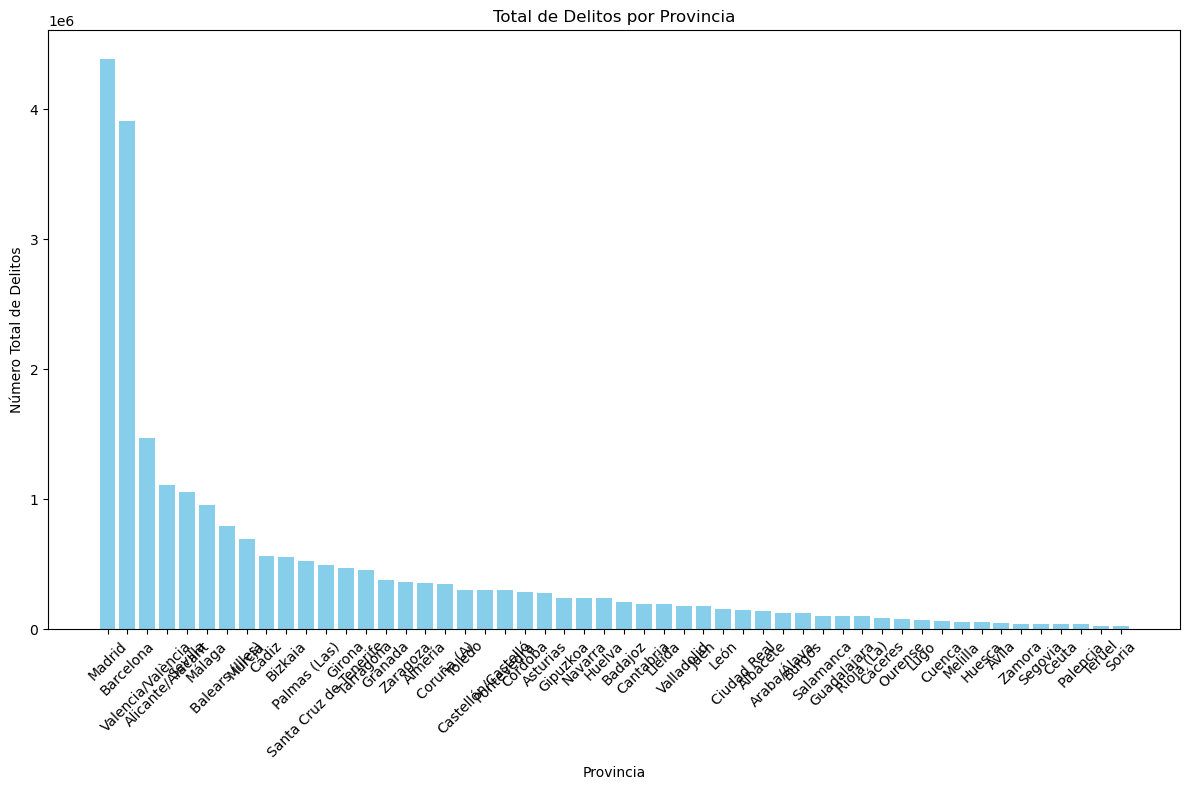

In [24]:
# SUMAR TODOS LOS DELITOS DE TODOS LOS AÑOS PARA CADA PROVINCIA
crime_columns = [
    'Assault', 'Injuries', 'small robberies', 'robs_with_force',
    'robs_force_vehicles', 'robs_force_homes', 'robs_force_stores',
    'robs_violence_intimidation', 'robs_violence_publicways',
    'robs_violence_homes', 'robs_violence_stores'
]

df_total_crimes = df_cleaned_af.groupby('Province').sum().reset_index() # Group by province
df_total_crimes['Total Crimes'] = df_total_crimes[crime_columns].sum(axis=1) # New column for total crimes.
df_total_crimes = df_total_crimes.sort_values(by='Total Crimes', ascending=False) # Descending order

# Bar histogram
plt.figure(figsize=(12, 8))
plt.bar(df_total_crimes['Province'], df_total_crimes['Total Crimes'], color='skyblue')
plt.title('Total de Delitos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número Total de Delitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
df_total_crimes

,Province,Assault,Injuries,small robberies,robs_with_force,robs_force_vehicles,robs_force_homes,robs_force_stores,robs_violence_intimidation,robs_violence_publicways,robs_violence_homes,robs_violence_stores
0,Albacete,23723.0,10892.0,55743.0,27171.0,6915.0,9750.0,3235.0,3358.0,2080.0,309.0,481.0
1,Alicante/Alacant,153916.0,64272.0,407104.0,236011.0,61974.0,111449.0,24240.0,29362.0,17958.0,2834.0,4016.0
2,Almería,60839.0,28453.0,101014.0,84272.0,22428.0,32321.0,7781.0,10558.0,6680.0,945.0,1347.0
3,Araba/Álava,18550.0,9004.0,61397.0,22575.0,96.0,7231.0,3566.0,3174.0,2200.0,267.0,463.0
4,Asturias,60640.0,28385.0,107720.0,39738.0,7577.0,12637.0,10411.0,7190.0,4280.0,704.0,1386.0
5,Badajoz,39186.0,18786.0,72294.0,41735.0,8946.0,12427.0,7871.0,3304.0,1848.0,371.0,742.0
6,Balears (Illes),116260.0,49643.0,373303.0,124702.0,41556.0,40988.0,16365.0,17794.0,11348.0,1125.0,2303.0
7,Barcelona,260434.0,138091.0,1925877.0,688934.0,294657.0,200863.0,18839.0,301514.0,59057.0,10232.0,7023.0
8,Bizkaia,70933.0,37497.0,238266.0,109236.0,245.0,37870.0,17522.0,22330.0,15383.0,2055.0,2577.0
9,Burgos,20252.0,9854.0,50113.0,23206.0,4923.0,7408.0,4159.0,2402.0,1474.0,213.0,433.0


In [ ]:
# SUMAR TODOS LOS DELITOS DE TODOS LOS AÑOS PARA CADA PROVINCIA

# Agrupar y sumar


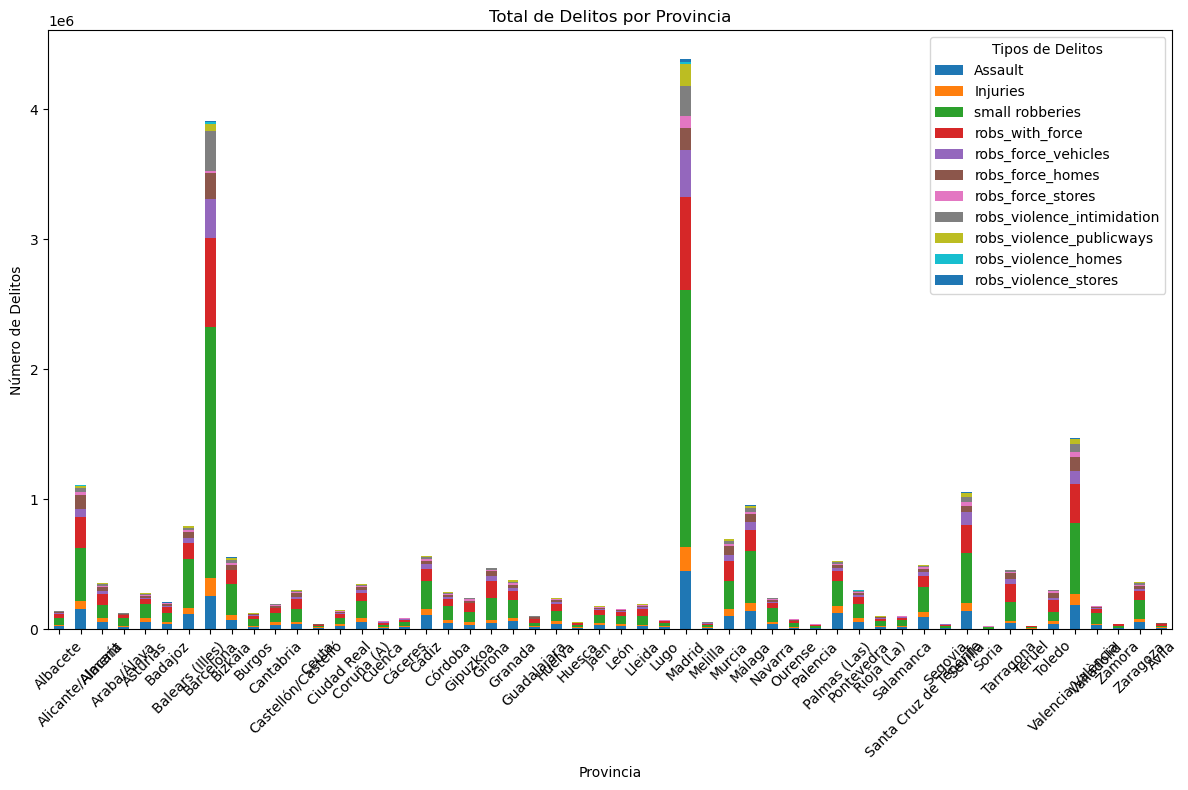

In [20]:
df_total_crimes.plot(x='Province', kind='bar', stacked=True, figsize=(12, 8))

plt.title('Total de Delitos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Delitos')
plt.legend(title='Tipos de Delitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# df_suma_delitos.to_excel('suma_delitos_por_provincia.xlsx', index=False)

In [ ]:
df_suma_delitos['Total'] = df_suma_delitos.iloc[:, 1:].sum(axis=1)

# Ver el resultado
print(df_suma_delitos[['Province', 'Total']])

### VAMOS CON LAS TENDENCIAS

In [ ]:
# Tenemos que agrupar todos los delitos por año y provincia

columns_to_sum = ['Assault', 'Injuries', 'small robberies', 'robs_with_force',
                  'robs_force_vehicles', 'robs_force_homes', 'robs_force_stores',
                  'robs_violence_intimidation', 'robs_violence_publicways',
                  'robs_violence_homes', 'robs_violence_stores']

# Creamos una nueva columna que sume todos los delitos para cada provincia y año
data_clean_years['total_crimes'] = data_clean_years[columns_to_sum].sum(axis=1)

# Visualizamos el DataFrame con la nueva columna
print(data_clean_years[['Province', 'year', 'total_crimes']])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos que el DataFrame esté ordenado por provincia y año
df_sorted = data_clean_years[['Province', 'year', 'total_crimes']].sort_values(by=['Province', 'year'])

# Configuración del tamaño de la gráfica
plt.figure(figsize=(12, 8))

# Graficamos las tendencias de cada provincia
sns.lineplot(data=df_sorted, x='year', y='total_crimes', hue='Province', marker='o', legend=False)

# Ajustamos el título y las etiquetas
plt.title('Tendencia de delitos totales por provincia a lo largo de los años', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Delitos Totales', fontsize=12)

# Mejoramos la visualización de los ticks en el eje X
plt.xticks(rotation=45)

# Mostramos la gráfica
plt.tight_layout()
plt.show()

In [27]:
# Filtrar las provincias con menos incremento tendencial

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Inicializamos un diccionario para almacenar la tasa de crecimiento de cada provincia
crecimiento = {}

# Iteramos sobre cada provincia
for provincia in data_clean_years['Province'].unique():
    df_provincia = data_clean_years[data_clean_years['Province'] == provincia]
    
    # Preparamos los datos para la regresión
    X = df_provincia['year'].values.reshape(-1, 1)
    y = df_provincia['total_crimes'].values
    
    # Realizamos la regresión lineal
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Almacenamos la pendiente (tasa de crecimiento) en el diccionario
    crecimiento[provincia] = modelo.coef_[0]

# Convertimos el diccionario en un DataFrame para facilitar la manipulación
df_crecimiento = pd.DataFrame(list(crecimiento.items()), columns=['Province', 'Growth Rate'])

# Ordenamos las provincias por tasa de crecimiento y seleccionamos las más altas
top_provincias = df_crecimiento.sort_values(by='Growth Rate', ascending=False).head(10)['Province'].tolist()

In [29]:
# Filtramos el DataFrame para incluir solo las provincias con mayor crecimiento
df_filtrado_crecimiento = data_clean_years[data_clean_years['Province'].isin(top_provincias)]

# Ordenamos el DataFrame filtrado por provincia y año
df_filtrado_crecimiento_sorted = df_filtrado_crecimiento[['Province', 'year', 'total_crimes']].sort_values(by=['Province', 'year'])

In [ ]:
# Configuración del tamaño de la gráfica
plt.figure(figsize=(12, 8))

# Graficar las tendencias de las provincias con mayor crecimiento
sns.lineplot(data=df_filtrado_crecimiento_sorted, x='year', y='total_crimes', hue='Province', marker='o', palette='tab10')

# Ajustar el título y las etiquetas
plt.title('Tendencia de delitos totales en provincias con mayor crecimiento tendencial', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Delitos Totales', fontsize=12)

# Mejorar la visualización de los ticks en el eje X
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [31]:
# Incremento porcentual entre el primer y el último año

In [ ]:
# Agrupar los datos por provincia y obtener el total de delitos del primer y último año
df_grouped = data_clean_years.groupby(['Province', 'year'])['total_crimes'].sum().reset_index()

# Encontrar el primer y el último año para cada provincia
df_first_last = df_grouped.groupby('Province').agg(
    first_year_total=('total_crimes', 'first'),
    last_year_total=('total_crimes', 'last')
).reset_index()

# Calcular el incremento porcentual
df_first_last['percentage_increase'] = ((df_first_last['first_year_total'] - df_first_last['last_year_total']) /
                                        df_first_last['last_year_total']) * 100

# Ordenar las provincias por incremento porcentual
df_sorted_increase = df_first_last.sort_values(by='percentage_increase', ascending=False)

# Mostrar el resultado
print(df_sorted_increase[['Province', 'first_year_total', 'last_year_total', 'percentage_increase']])

In [ ]:
# Configuración del tamaño de la gráfica
plt.figure(figsize=(12, 8))

# Graficar el incremento porcentual de delitos por provincia
sns.barplot(data=df_first_last, x='percentage_increase', y='Province', palette='viridis')

# Ajustar el título y las etiquetas
plt.title('Incremento Porcentual de Delitos por Provincia', fontsize=16)
plt.xlabel('Incremento Porcentual (%)', fontsize=12)
plt.ylabel('Provincia', fontsize=12)

# Mejorar la visualización de los ticks en el eje X
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [ ]:
# Agrupar por provincia y año y calcular la media de cada delito
df_mean = data_clean_years.groupby(['Province', 'year'])[['Assault', 'Injuries', 'small robberies', 
                                            'robs_with_force', 'robs_force_vehicles', 
                                            'robs_force_homes', 'robs_force_stores', 
                                            'robs_violence_intimidation', 'robs_violence_publicways', 
                                            'robs_violence_homes', 'robs_violence_stores']].mean().reset_index()

# Mostrar el resultado
print(df_mean.head())

In [ ]:
# Configuración del tamaño de la gráfica
plt.figure(figsize=(14, 10))

# Graficar las medias de delitos por provincia
df_melted = df_mean.melt(id_vars='Province', var_name='Type', value_name='Average')

# Graficar
sns.barplot(data=df_melted, x='Average', y='Province', hue='Type', palette='tab10')

# Ajustar el título y las etiquetas
plt.title('Media de Delitos por Provincia', fontsize=16)
plt.xlabel('Media de Delitos', fontsize=12)
plt.ylabel('Provincia', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
# USELESS TRASH
'''
print(data_clean_years.columns)
data_clean_years.columns = data_clean_years.columns.str.strip()
if 'Assault' not in data_clean_years.columns:
    print("La columna 'Assault' no se encuentra en el DataFrame.")
else:
    print("La columna 'Assault' está presente.")
'''
#data_formated_year = convert_year_into_datetime(data_clean_years)
#df.columns = df.columns.str.lower().str.replace(" ","_").str.replace(".","_").str.replace(":","").str.strip()
#df.rename(columns={"species_" : "species", "unnamed_11" : "death"}, inplace= True)

'''
MAPA COLOREADO POR PROVINCIAS
# Cargar el shapefile de las provincias
gdf_provincias = gpd.read_file('path_to_shapefile.shp')  # Reemplaza con el camino a tu shapefile

# Cargar el DataFrame con los datos de delitos
df_delitos = pd.read_excel('suma_delitos_por_provincia.xlsx')  # Reemplaza con el camino a tu archivo Excel

# Asegúrate de que los nombres de las provincias en ambos DataFrames coincidan
# Puedes necesitar ajustar los nombres o hacer una correspondencia entre ellos

# Unir los datos de delitos con el GeoDataFrame
gdf_provincias = gdf_provincias.merge(df_delitos, left_on='province_column_in_shapefile', right_on='Province')  # Ajusta los nombres de las columnas

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_provincias.plot(column='Assault',  # Reemplaza con la columna que desees visualizar
                    cmap='OrRd',  # Elige un esquema de colores
                    linewidth=0.8,
                    ax=ax,
                    edgecolor='0.8',
                    legend=True)

ax.set_title('Número de Delitos por Provincia en España')
ax.set_axis_off()

plt.show()
'''



'''
def verify_and_switch_datatypes(data_clean_years, assigned_types):
    # Itera sobre cada columna y su tipo asignado en el diccionario
    for column_name, expected_type in assigned_types.items():
        # Obtiene el tipo actual de la columna
        currently_type = data_clean_years[column_name].dtype
        
        if currently_type != expected_type:
            try:
                # Convierte la columna al tipo esperado
                data_clean_years[column_name] = data_clean_years[column_name].astype(expected_type)
                print(f"Column '{column_name}' converted from {currently_type} to {expected_type}.")
            except Exception as e:
                print(f"It was not possible to switch the '{column_name}' type to {expected_type}: {e}")
        else:
            print(f"Column '{column_name}' is currently correctly typed as ({currently_type}).")
    
    return data_clean_years

# Ejemplo de cómo aplicar la función
assigned_types = {
    'Province': str,
    'Assault': int,
    'Injuries': int,
    'small robberies': int,
    'robs_with_force': int,
    'robs_force_vehicles': int,  
    'robs_force_homes': int,
    'robs_force_stores': int,
    'robs_violence_intimidation': int,
    'robs_violence_publicways': int,
    'robs_violence_homes': int, 
    'robs_violence_stores': int,
    'year': int
}

# Supongamos que `data_clean_years` es tu DataFrame
data_clean_years = verify_and_switch_datatypes(data_clean_years, assigned_types)
'''